Dataset Shape: (10, 4)

First 5 Rows:
    SquareFootage  Bedrooms  Bathrooms   Price
0            850         2          1  100000
1            900         2          2  120000
2           1200         3          2  150000
3           1500         3          2  180000
4           1800         3          3  210000

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SquareFootage  10 non-null     int64
 1   Bedrooms       10 non-null     int64
 2   Bathrooms      10 non-null     int64
 3   Price          10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes
None

Summary Statistics:

       SquareFootage   Bedrooms  Bathrooms          Price
count      10.000000  10.000000  10.000000      10.000000
mean     1865.000000   3.500000   2.600000  236000.000000
std       749.833315   1.080123   0.966092  101236.796121
min       850.

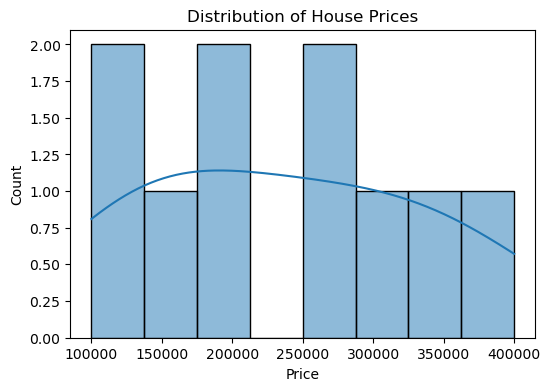

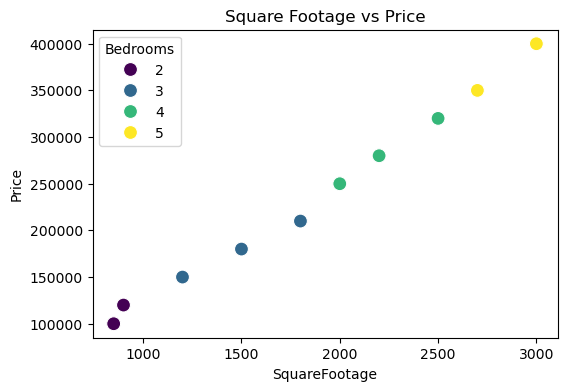

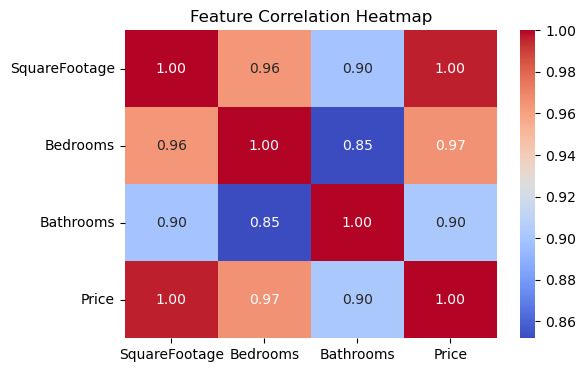

Training Set Shape: (8, 3)
Testing Set Shape: (2, 3)
Model Coefficients: [  122.17413883 14038.42824996 -1526.74398477]
Model Intercept: -38907.73758005875

📊 Model Evaluation:
Mean Absolute Error (MAE): 14487.623333910291
Mean Squared Error (MSE): 299005222.04156226
Root Mean Squared Error (RMSE): 17291.767464361827
R² Score: 0.9773909094864603

Comparison of Actual vs Predicted:
    Actual      Predicted
8  350000  355047.602562
1  120000   96072.355894


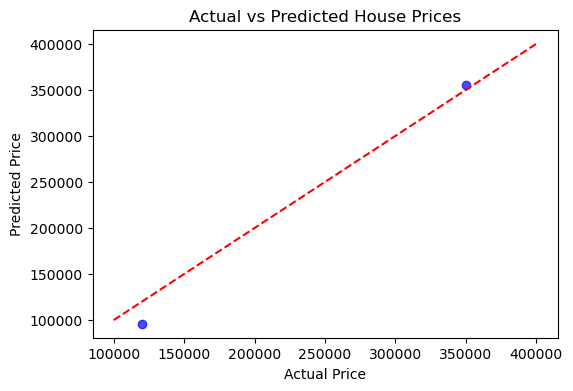

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\preethi\Downloads\house_price_sample.csv")  # <-- change path if needed

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
# Dataset Info
print("\nDataset Info:\n")
print(df.info())

# Summary Stats
print("\nSummary Statistics:\n")
print(df.describe())

# Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Fill missing values if any
df.fillna(df.median(numeric_only=True), inplace=True)

# Histogram of Price
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], bins=8, kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Scatterplot: Square Footage vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='SquareFootage', y='Price', data=df, hue='Bedrooms', palette='viridis', s=100)
plt.title("Square Footage vs Price")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
# Define features (X) and target (y)
X = df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Split into training and testing set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Coefficients & Intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Compare Actual vs Predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted:\n", results.head())

# Plot Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

